# Pandas Cheatsheet

The pandas library is at the core of any data science project involving tabulated data in Python. It allows you to efficiently manipulate tabulated data, making data preparation and feature engineering tasks easier. It includes
many built in functions for common tasks with tabulated data. This notebook can be used as a resource for common pandas activities. Its based on the pandas cheat sheets from data camp found here: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf

and dataquest, found here: 
https://www.dataquest.io/blog/pandas-cheat-sheet/

In [102]:
import pandas
pandas.__version__

'0.20.1'

In [103]:
import pandas as pd
import numpy as np

## Importing Datasets

Pandas allows you to read in a variety of data types into its tabular DataFrame object, allowing the machine learning and data science fun to begin

In [ ]:
pd.read_csv(filename) # from a CSV
pd.read_table(filename) # from a tab delimited (TSV)
pd.read_excel(filename) #from Excel
pd.read_sql(query, connection_object) # read in from an SQL table or database
pd.read_json(json_string) # read in from a JSON
pd.read_html(url) # parse a html URL, string or file and extract tables to a list of dataframes
pd.read_clipboard() # read in the contents of your clipboard
pd.DataFrame(dict) # read in data from a dictionary object, using the keys as column names

In [74]:
df = pd.read_csv("/Users/constar/Documents/GitHub/Data_Science_Portfolio/Pandas_Cheatsheet/train.csv")

## Exporting Data

If you wish you can also export data out of a DataFrame in various formats

In [ ]:
df.to_csv(filename) # writes to a CSV
df.to_excel(filename) # writes to an Excel file
df.to_sql(table_name, connection_object) # writes to a SQL table
df.to_json(filename) # writes to a JSON file
df.to_html(filename) # saves as an HTML table
df.to_clipboard() # copies to the clipboard

## Create Testing Objects

If you want to test out some Pandas features without reading in or setting up some data yourself, these built in functions generate toy data for you

In [ ]:
pd.DataFrame(np.random.rand(20,5)) # 5 columns and 20 rows of random floats
pd.Series(my_list) # creates a series from an iterable my_list
df.index = pd.date_range('1900/1/30',periods=df.shape[0]) # adds a date index

In [75]:
my_list = [1,2,3,4,5,6,7,8,8,1,0]
s = pd.Series(my_list)

## Inspecting Data

Various functions allow you to inspect the dataframe itself or its attributes

In [77]:
df.head(5) # print the firtst 5 rows of the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df.tail(5) # print the last 5 rows in the dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [79]:
df.shape # print the no. of rows and columns in the dataframe

(891, 12)

In [80]:
df.info() # print information about each column in the dataframe and the memory use and dtypes of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [81]:
df.describe() # summary statistics for all numerical columns in the dataframe

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
s.value_counts(dropna=False) # view the unique values and counts in a series obkect

8    2
1    2
7    1
6    1
5    1
4    1
3    1
2    1
0    1
dtype: int64

In [83]:
df.apply(pd.Series.value_counts) # unique values and counts for each column in the dataframe

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:5637: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes)
/Applications/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '>' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,549.0,NaN,NaN,NaN,NaN,608.0,678.0,NaN,15.0,NaN,NaN
1,1.0,342.0,216.0,NaN,NaN,7.0,209.0,118.0,NaN,NaN,NaN,NaN
2,1.0,NaN,184.0,NaN,NaN,10.0,28.0,80.0,NaN,NaN,NaN,NaN
3,1.0,NaN,491.0,NaN,NaN,6.0,16.0,5.0,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,10.0,18.0,4.0,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,4.0,5.0,5.0,NaN,1.0,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,3.0,NaN,1.0,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,4.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,2.0,NaN,NaN


## Selecting from Series and Dataframes

There are several different approaches for selecting data from pandas series or dataframe objects

In [ ]:
df.PassengerId # df.col returns a column as a series object

In [ ]:
df[['PassengerId', 'Pclass']] # returns multiple columns as a new dataframe object

In [85]:
s.iloc[0] # selection by position in series. First value = 0

1

In [86]:
 s.loc[9] # selection by index

1

In [87]:
df.iloc[0, :] # first row of dataframe

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [88]:
df.iloc[0,0] #first element of first column of dataframe

1

## Data Cleaning

Pandas has some built in functions for rapidly dealing with missing values, renaming values or columns and changing the data types of specified values/columns

In [89]:
df.columns = ['a','b','c','d','e','f','g','h','i','j','k','l'] # rename the columns of a dataframe

In [90]:
pd.isnull(df) # check for null values. Return a boolean array

,a,b,c,d,e,f,g,h,i,j,k,l
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
pd.notnull(df) # opposite of .isnull()

In [ ]:
df.dropna(axis = 1) # drop columns that contain null values

In [ ]:
df.dropna(axis = 1, thresh=n) # drop all rows which contain less than n NON-null values

In [ ]:
df.fillna(x) # replace all null values with x (whatever you want)

In [91]:
df.fillna(method = 'ffill') #fills with the value above or below the missing value in the column

,a,b,c,d,e,f,g,h,i,j,k,l
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C


In [ ]:
df.fillna(df.mean()) # fill with the mean() or any built in or user defined statistics function  

In [ ]:
s.astype(float) # convert the datatype to float

In [ ]:
s.replace(1, 'one') # replaces all values equal to 1 with the string 'one'

In [ ]:
s.replace([1,3]['one','three']) # replace each instance or 1 or 3 with 'one' for 1 and 'three' for 3

In [ ]:
df.rename(columns=lambda x: x + 1) # mass renaming of columns with a lambda function

In [ ]:
df.rename(columns = {'old_name' : 'new_name'}) # selective renaming of columns

In [ ]:
df.set_index('column_one') # changes the index to a particular column by name

In [ ]:
df.rename(index = lambda x: x +1) # mass renaming of the index with a lambda function


## Filter, Sort, Groupby

Several built in functions in pandas help with the filtering, sorting and grouping of values based on specified criteria. There is a built in pivot table and .apply function for applying a numpy function over all column or row

In [ ]:
df[df[col] > 0.5] # filter for rows where the col column is > 0.5

In [ ]:
df[(df[col] > 0.5) & (df[col] < 0.7)] # rows where a col is > 0.5 and < 0.7

In [ ]:
df.sort_values('a') # sort values in a column in ascending order

In [ ]:
df.sort_values('b', ascending=False) # sort a column by name in descending order ascending = False

In [ ]:
df.sort_values(['col1','col2'], ascending = [True, False]) # sort values by col1 in ascending order and the col2
                                                           # in descending order

In [ ]:
df.groupby('a') # return a groupby object for values from one column

In [ ]:
df.groupby(['a', 'b']) # return a groupby obect for values from multiple columns

In [ ]:
df.groupby('a')['b'].mean() # returns the mean values (or other stats function) of column 'b' 
                            # grouped by the values in column 'a'

In [94]:
df.pivot_table(index = 'a', values = ['b','c'], aggfunc = 'mean') # creates a pivot table that groups by 'a' and 
                                                                # and calculates the mean of columns 'b' and 'c'  

,b,c
a,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
6,0,3
7,0,1
8,0,3
9,1,3


In [ ]:
df.groupby('a').agg(np.mean) # finds average over all columns for every unique column 'a' group (value)

In [ ]:
df.apply(np.mean) # apply a function across each column

In [ ]:
df.apply(np.max, axis = 1) # apply a function across each row

## Join or Combine

The joining and combining of dataframes in every conceivable manner is possible with built in .append, .concat and .join functions

In [96]:
df1 = df
df2 = df

In [97]:
df1.append(df2) # adds to rows in df1 to the end of df2 under identical columns

,a,b,c,d,e,f,g,h,i,j,k,l
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
pd.concat([df1, df2], axis = 1) # concatenates the columns of df1 and df2 where rows are identical

In [ ]:
df1.join(df2, on = 'a', how = 'inner') # an SQL style join between the columns in df1 with the columns in df2 
                                        #where the rows for 'a' have identical values. other how =  methods avaialble
                                        # 'left', 'right', 'outer', 'inner'

## Statistics

Built in functions allow basic descriptive statistics to be generated for columns in the dataframe

In [ ]:
df.describe() # returns summary statistics for numerical columns

In [ ]:
df.mean() # mean of all columns
df.corr() # returns correlation between columns
df.count() # returns the number of non-null values in each column
df.max() # returns the highest value in each column
df.min() # returns the lowest value in each column
df.median() # returns the median value of each column
df.std()  #returns the standard deviation of each column

## Visualisation

Pandas is not a so
phisticated visualisation library but it does include the .plot function for having a quick peak at the data. It used the matplotlib backend. 

You can specify many plot options include kind = which may be 'line' (default)
‘bar’ : vertical bar plot
‘barh’ : horizontal bar plot
‘hist’ : histogram
‘box’ : boxplot
‘kde’ : Kernel Density Estimation plot
‘density’ : same as ‘kde’
‘area’ : area plot
‘pie’ : pie plot
‘scatter’ : scatter plot
‘hexbin’

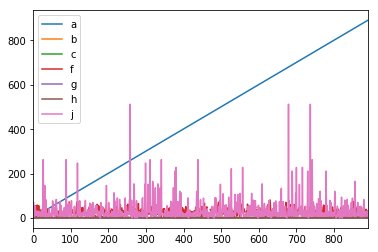

In [100]:
%matplotlib inline

df.plot() 